# DinoBank

### Desafio Stefanini - Hackathon de I.A

Pesquisadores da Stefanini Research, uma equipe de pesquisadores secretos dentro da empresa Stefanini que atua para clientes especiais, e uma equipe da SNASA, o ‘S’ do nome significa secret e trata de uma equipe especial dentro da NASA que busca  explicar fenômenos que ainda deixam resquícios de dúvidas, juntos descobriram recentemente que alguns anos antes do meteoro atingir a Terra ele ficou girando em torno da órbita gerando um campo magnético que teve um efeito nos dinossauros dessa época tornando-os super inteligentes. 
A partir de então, predadores e presas parecem ter deixado de lado seus lados selvagens e começaram a produzir suas próprias tecnologias, uma dessas descobertas foi a Nuvem Jurássica, da onde até o momento o que se conseguiu recuperar foi uma página de um jornal chamado DinoNews onde falam a respeitos do fundador do maior banco daquela época. Aardonyx, fundador do DinoBank e da familia dos Troodontes, que eram considerados os dinossauros mais inteligentes da época, aparece falando sobre o desenvolvimento do que parece ser a primeira moeda digital do mundo, a DinoCoin, porém, parece que o volume de dados foi muito grande e começaram a ter problemas de clientes que não tinham retorno sobre seus investimentos, clientes que começaram a fraudar dados e gerar muita perda de dinheiro.
Um dos outros relatos apresentados no DinoNews foi que o DinoBank também não sabia como oferecer empréstimos e produtos de seguros para os clientes, já que os dados não estão centralizados e tratados adequadamente.

Junto à página do jornal foi encontrado também alguns arquivos CSVs que são os seguintes: acounts_dinos.csv, dinos.csv, .

	Vocês foram escolhidos para ajudar a Stefanini e a SNASA para desenvolver ******* QUESTOES DA PROVA

### Questão número 1

Realize o pré-processamento dos dados e explique a razão de cada escolha:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# Tratando a informação do Trade.csv


O método [Describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) informa algumas características do dataset. Aqui podemos ver que não houve valores muito discrepantes com o esperado.

In [2]:
trade = pd.read_csv('trade.csv')
trade.describe()

,Open,High,Low,Last,Close
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595
std,49.350352,50.127368,48.597083,49.420366,49.401844
min,81.100000,82.800000,80.000000,81.000000,80.950000
25%,120.750000,122.675000,119.000000,120.600000,120.550000
50%,142.250000,144.300000,140.425000,142.000000,141.950000
75%,159.000000,161.500000,156.825000,158.712500,158.762500
max,327.700000,328.750000,321.650000,325.950000,325.750000


## Foi criada uma função que remove a substring `A.M` da data informada. 

Isso permite que seja possível aplicar o [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) e assim, futuramente, derivar informações através dessa data.

In [3]:
def _remove_am_from_date(row):
    return row[:-5]

In [4]:
trade['Date'] = trade['Date'].apply(_remove_am_from_date).apply(pd.to_datetime)

In [5]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 6 columns):
Open     2100 non-null float64
High     2100 non-null float64
Low      2100 non-null float64
Last     2100 non-null float64
Close    2100 non-null float64
Date     2100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 98.5 KB


In [6]:
trade.dtypes

Open            float64
High            float64
Low             float64
Last            float64
Close           float64
Date     datetime64[ns]
dtype: object

In [7]:
trade.head()

,Open,High,Low,Last,Close,Date
0,210.60,214.90,210.00,213.50,213.80,1710-07-21
1,214.95,215.35,209.90,210.55,210.05,1710-07-22
2,219.00,220.35,213.60,214.20,214.60,1710-07-23
3,219.95,221.05,218.05,218.95,219.10,1710-07-26
4,222.00,223.65,218.85,219.55,219.40,1710-07-27


## Plot dos valores de open, close, etc..

`molten` é um dataframe pivotado. De forma que podemos plotar um gráfico com a variação dos valores das colunas ao longo do tempo

In [8]:
molten = pd.melt(trade, id_vars = 'Date') 
molten.head()

,Date,variable,value
0,1710-07-21,Open,210.60
1,1710-07-22,Open,214.95
2,1710-07-23,Open,219.00
3,1710-07-26,Open,219.95
4,1710-07-27,Open,222.00


### Limitar o número de bins do eixo X nesse gráfico, a fim de podermos ver quais as datas. 

[limitando o número de labels no eixo](https://stackoverflow.com/questions/32894854/change-number-of-x-axis-ticks-in-seaborn-plots)

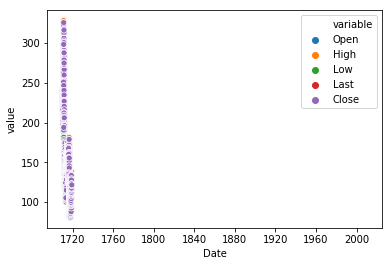

In [9]:
sns.scatterplot(x='Date', y='value', hue='variable', data=molten)

# Tratando os dados de dinos.csv

In [10]:
dinos = pd.read_csv('dinos.csv')
dinos.head()

,name,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,C1231006815,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,C1666544295,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,C1305486145,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,C840083671,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,C2048537720,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
dinos.columns

Index(['name', 'age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
dinos.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
dinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
name               45222 non-null object
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


# Vamos transformar as colunas categoricas em categorias

Com o uso do [df.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) podemos transformar as colunas categoricas em categorias de vdd para o pandas.

In [14]:
columns_to_categorical = ['workclass', 'education_level', 'marital-status', 
                          'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

dinos[columns_to_categorical] = dinos[columns_to_categorical].astype('category')
dinos.dtypes

name                 object
age                   int64
workclass          category
education_level    category
education-num         int64
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
dtype: object

# Agora vamos contar quantos registros existem para cada categoria de cada coluna categorica

In [15]:
dinos['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

# Gráfico da coluna workclass

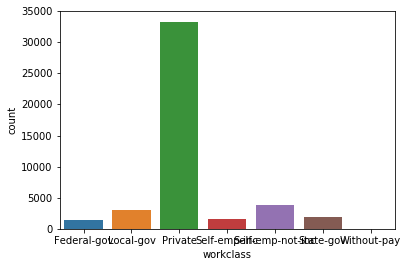

In [16]:
sns.countplot(x='workclass', data=dinos)

In [17]:
dinos['education_level'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education_level, dtype: int64

In [18]:
dinos['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [19]:
dinos['occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [20]:
dinos['relationship'].value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [21]:
dinos['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [22]:
dinos['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [23]:
def transform_income(row):
    """
    Transformação da coluna income.
    
    Essa função realiza a transformação da string indicando o income, para um valor binário.
    """
    if row == '<=50K':
        return 0
    else:
        return 1
    
dinos['income'] = dinos['income'].apply(transform_income)

In [24]:
dinos.head()

,name,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,C1231006815,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,C1666544295,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,C1305486145,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,C840083671,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,C2048537720,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [25]:
dinos.drop('education_level', axis=1, inplace=True)

In [26]:
dinos = pd.get_dummies(dinos, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

In [27]:
dinos.head()

,name,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,C1231006815,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,C1666544295,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,C1305486145,38,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,C840083671,53,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,C2048537720,28,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Tratando os dados de acounts_dinos.csv

In [28]:
acounts = pd.read_csv('acounts_dinos.csv')
acounts.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
acounts.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [30]:
acounts.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,83681.000000,8.368100e+04,8.368100e+04,8.368100e+04,8.368100e+04,8.368100e+04,83681.000000,83681.0
mean,8.207048,1.684377e+05,8.883208e+05,9.049997e+05,8.654494e+05,1.180119e+06,0.001338,0.0
std,1.859548,3.364301e+05,2.729533e+06,2.768001e+06,2.396431e+06,2.825521e+06,0.036560,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.545890e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,4.862745e+04,1.987000e+04,0.000000e+00,1.912700e+04,3.656534e+04,0.000000,0.0
75%,9.000000,2.055779e+05,1.794150e+05,2.019420e+05,5.550865e+05,1.018381e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.130000e+07,3.200000e+07,1.000000,0.0


In [31]:
acounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83681 entries, 0 to 83680
Data columns (total 11 columns):
step              83681 non-null int64
type              83681 non-null object
amount            83681 non-null float64
nameOrig          83681 non-null object
oldbalanceOrg     83681 non-null float64
newbalanceOrig    83681 non-null float64
nameDest          83681 non-null object
oldbalanceDest    83681 non-null float64
newbalanceDest    83681 non-null float64
isFraud           83681 non-null int64
isFlaggedFraud    83681 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 7.0+ MB


In [32]:
columns_to_categorical = ['type']

acounts[columns_to_categorical] = acounts[columns_to_categorical].astype('category')
acounts.dtypes

step                 int64
type              category
amount             float64
nameOrig            object
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest            object
oldbalanceDest     float64
newbalanceDest     float64
isFraud              int64
isFlaggedFraud       int64
dtype: object

### Questão número 2

Um passo importante na preparação dos dados para a utilização de Machine Learning é a realização da atividade de Engenharia de Características. Descreva os passos realizados para a obtenção de novas características e como as mesmas afetaram a acurácia do modelo. 

Caso julgue que o processo de Engenharia de Características seja desnecessário, explique o porquê.


In [33]:
acounts.groupby(['type']).sum()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,139435,2.890074e+09,6.624700e+10,6.913117e+10,2.396377e+10,2.652128e+10,0,0
CASH_OUT,216726,4.776745e+09,2.212011e+09,1.397800e+09,3.255859e+10,4.599343e+10,57,0
DEBIT,5439,3.484047e+06,8.518893e+07,8.243081e+07,6.566062e+08,8.049659e+08,0,0
PAYMENT,266874,3.612651e+08,5.059273e+09,4.849195e+09,0.000000e+00,0.000000e+00,0,0
TRANSFER,58300,6.063469e+09,7.321042e+08,2.706795e+08,1.524270e+10,2.543382e+10,55,0


# Vemos que todas as operações de cash_out e payment são responsáveis pela soma das fraudes.

# Vamos ver quantas fraudes possue cada pessoa.

In [34]:
columns_to_categorical = ['nameOrig','nameDest']

acounts[columns_to_categorical] = acounts[columns_to_categorical].astype('category')
acounts.dtypes

step                 int64
type              category
amount             float64
nameOrig          category
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest          category
oldbalanceDest     float64
newbalanceDest     float64
isFraud              int64
isFlaggedFraud       int64
dtype: object

In [35]:
acounts.groupby(['nameOrig']).sum().reset_index()

,nameOrig,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,C1000039823,8,7781.12,0.00,0.00,0.00,0.00,0,0
1,C1000079132,9,2955.97,1064562.21,1067518.18,153153.22,0.00,0,0
2,C1000119377,8,144.56,619270.89,619126.33,0.00,0.00,0,0
3,C10001825,1,2655.04,21214.00,18558.96,1116396.05,1268668.92,0,0
4,C1000183504,9,158429.53,5819724.36,5978153.89,277875.93,257730.09,0,0
5,C100022590,8,162472.67,1157299.88,1319772.56,4841453.46,5478833.48,0,0
6,C1000229380,9,380114.95,0.00,0.00,412068.27,1239569.54,0,0
7,C1000231597,8,1361999.80,0.00,0.00,8831221.49,12800000.00,0,0
8,C1000281217,9,175781.56,29448.00,205229.56,0.00,0.00,0,0
9,C1000287699,10,84968.82,53409.00,0.00,68387.26,0.00,0,0


In [36]:
fraudulentos = acounts.groupby(['nameOrig']).sum().reset_index()[['nameOrig', 'isFraud']]

In [37]:
acounts.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [38]:
_dinos = dinos[['name','age', 'capital-gain', 'income']]
_dinos = _dinos.merge(acounts.drop(['type', 'nameDest', 'isFlaggedFraud', 'step'], axis=1), left_on='name', right_on='nameOrig')
_dinos.to_csv('dinos_fraud.csv')

## Justificativa e Discussão:

A Engenharia de Características é necessária.
## trade: 
    1. Na coluna Date foi removido a indicação AM, e a coluna Date desmembrada em 3 colunas (ano, mês, dia).
    2. Criamos uma nova característica, subtraindo o valor de fechamento (close) do valor de abertura (open).
## dinos:
    3. remoção de colunas com informações duplicadas (education_level e education_num), foi removida a coluna education_level. 
    4. Criamos uma função para a coluna income, onde os valores menores ou iguais à 50k recebem zero e maior que 50k recebem 1. 
    5. Análise de dados por histograma, visando verificar a integridade dos dados de cada coluna (característica).
    6. Transformação dos dados do tipo objeto para dados categóricos.
## acount: 
    7. Análise de dados por histograma, visando verificar a integridade dos dados de cada coluna (característica).
    8. Transformação dos dados do tipo objeto para dados categóricos.
    9. Contagem do número de fraudes para cada dinos criando um outro dateset com informação de qual dino é fraudulento (dinos_fraude). 
    
Obs: a normalização dos dados é feito no algoritmo de regressão.
    
A engenharia de Características é importante para identificar os atributos mais importantes na classificação dos exemplos.
    

# Tratando os dados de Data

In [39]:
trade['year'] = trade['Date'].apply(lambda x: x.year)
trade['month'] = trade['Date'].apply(lambda x: x.month)
trade['day'] = trade['Date'].apply(lambda x: x.day)

trade.drop('Date', axis=1, inplace=True)
trade['variacao']=trade['Close']-trade['Open']
trade.to_csv('trade_model.csv')

### Questão número 3

Considerando o modelo desenvolvido na questão 3 do Notebook de Machine Learning, gere um CSV com base na classificação obtida no conjunto de teste (counts.csv). Este CSV deve conter apenas quais dinossauros podem ser considerados bons investidores para o Dinobank. 